In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

wine = sklearn_to_df(datasets.load_wine())
wine.rename(columns={'target':'class'}, inplace=True)
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [3]:
wine.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


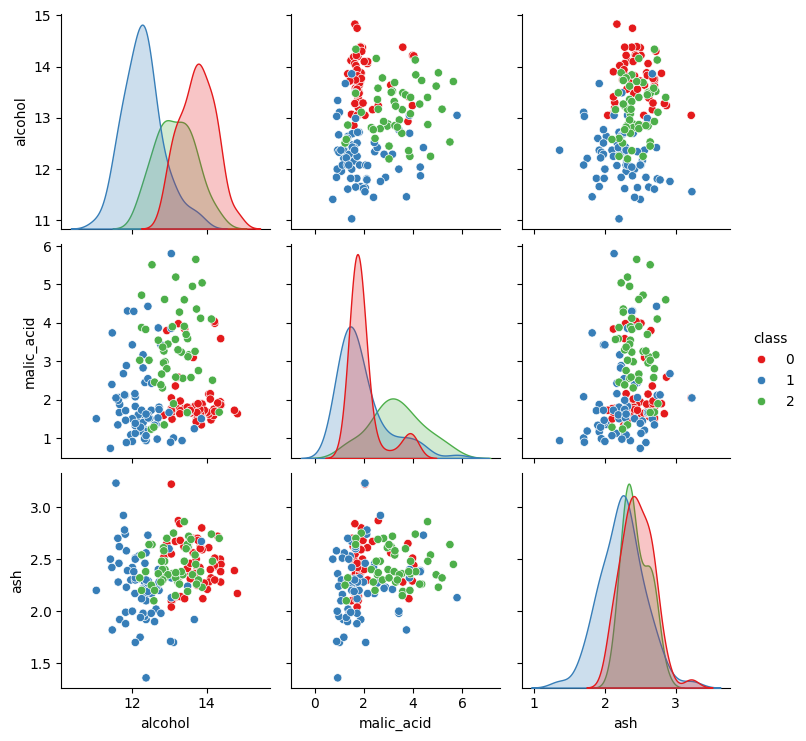

In [4]:
sns.pairplot(wine[['alcohol', 'malic_acid', 'ash', 'class']], hue='class', palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split
x = wine.drop('class', axis=1)
y = wine['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print(f"Jumlah data training: {len(x_train)}")
print(f"Jumlah data testing: {len(x_test)}")

Jumlah data training: 124
Jumlah data testing: 54


In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.89      0.89      0.89        27
           2       0.69      0.92      0.79        12

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.84        54
weighted avg       0.88      0.85      0.85        54



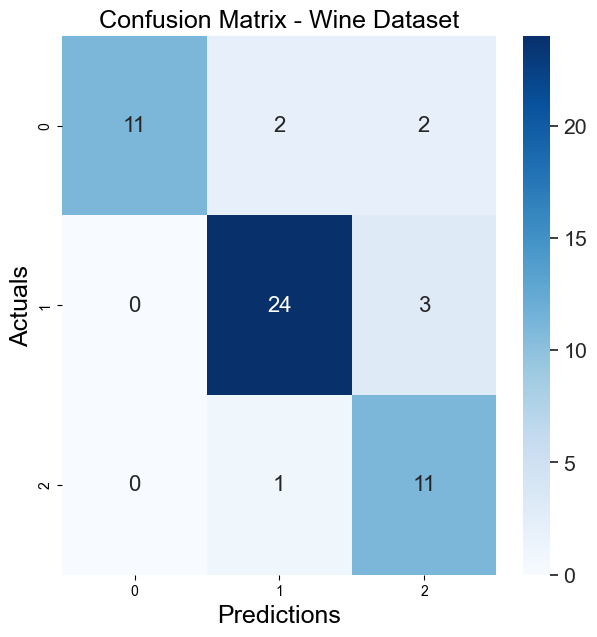

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, ax=ax, annot=True, annot_kws={"size": 16}, cmap="Blues")
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Wine Dataset', fontsize=18)
plt.show()

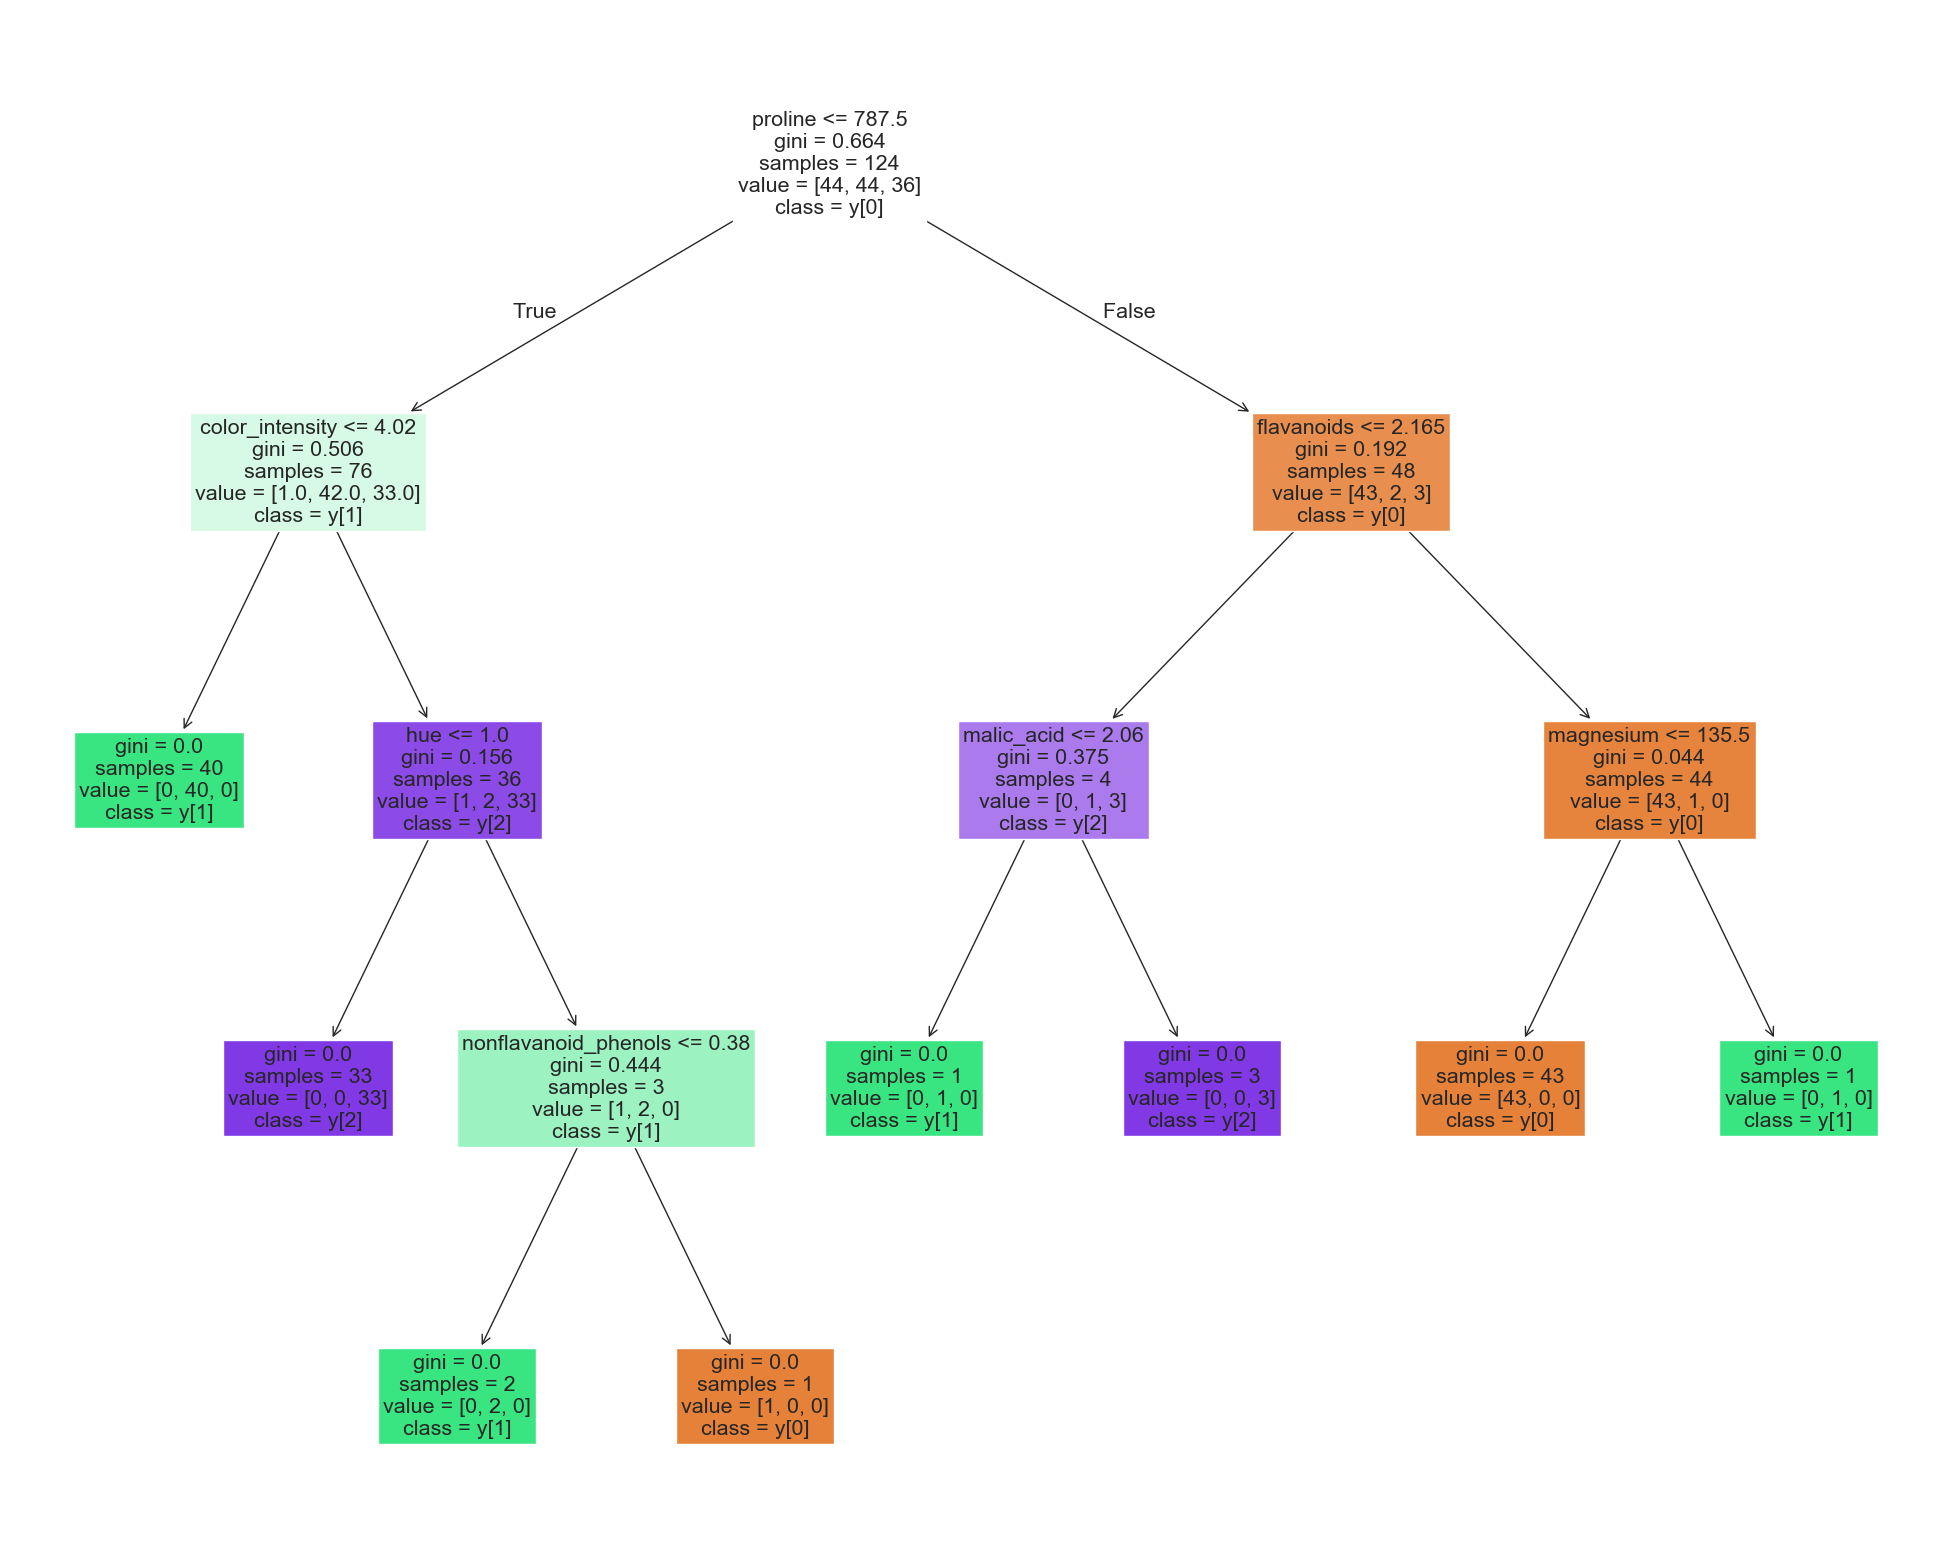

In [9]:
from sklearn import tree
features = x.columns.tolist()
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features, class_names=True, filled=True)
plt.show()

In [10]:
wine_test_data = {
    'alcohol': 13.0,
    'malic_acid': 2.0,
    'ash': 2.4,
    'alcalinity_of_ash': 18.0,
    'magnesium': 100,
    'total_phenols': 2.5,
    'flavanoids': 2.0,
    'nonflavanoid_phenols': 0.3,
    'proanthocyanins': 1.5,
    'color_intensity': 5.0,
    'hue': 1.0,
    'od280/od315_of_diluted_wines': 3.0,
    'proline': 1000
}
wine_input_df = pd.DataFrame([wine_test_data])
wine_prediction = model.predict(wine_input_df[features])
print(f"Prediksi kelas wine: {wine_prediction}")

Prediksi kelas wine: [1]
